# NCAA Men's March Madness Statistics
**Years from 2013-2019**

If you want a breakdown of stats by team, follow this link. https://datastudio.google.com/reporting/b6387c40-1c20-431b-9dc6-9624a912c91e

**Acronyms and Stats**

* ADJOE: Adjusted Offensive Efficiency (Points per 100 possessions) 
* ADJDE: Ajusted Defensive Efficiency (Points allowed per 100 possesions)
* TOR: Offensive Turn Over Rate (Per 100 possesions)
* TORD: Defensive Turnover Rate (Steals)
* EFG_O: Effective Field Goal Percentage Shot
* EFG_D: Effective Field Goal Percentage Allowed
* FTR: Free Throws Percentage Made
* FTRD: Free Throw Percentage Allowed
* ORB: Offensive Rebound Percentage
* DRB Defensive Rebound Percentage
* 2P_O: Two Point Shot Percentage Made
* 2P_D: Two Point Shot Percentage Allowed
* 3P_O: Three Point Shot Percentage Made
* 3P_D: Three Point Shot Percentage Allowed
* ADJ_T: Adjusted Tempo (Possesions Per 40 Minutes)

# Key Take Aways

* ADJOE was the stat with the highest correlation with championship caliber teams.
* EFG_O had a moderate correlation with ADJOE with a value of 0.58.
* 2P_O and 3P_O have a strong correlation with EFG_O at a value of o.87 and 0.73 respectivly.
* TOR had a moderate NEGATIVE correlation with ADJOE with a value of -0.49.

# Code For Data Analysis

In [80]:
# Importing relevent packages for the data analysis

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import f_oneway 
from statsmodels.stats.multicomp import pairwise_tukeyhsd

%matplotlib inline
pd.set_option("display.max_rows", 100, "display.max_columns", 100)

In [81]:
#Loading the basketball dataset
Basketball_Data = pd.read_csv('/Users/jonathanlewis/Desktop/Basketball/cbb.csv')

In [82]:
#Selecting teams that particapted in March Madness
Qaulified_For_MM = Basketball_Data[Basketball_Data['POSTSEASON'].notna()].reset_index(drop=True)
Postseason_labels = ['R68', 'R64','R32','S16','E8', 'F4','2ND','Champions']

#Creating a function to check if the p value of a set of data is greater than or equal to .05 and performing a Turkey test if true.
def F_Oneway_Turkey(stat):
    fstat, pval = f_oneway(*(Qaulified_For_MM[stat][Qaulified_For_MM['POSTSEASON'] == i] for i in Postseason_labels))
    if pval <= .05:
        return print(pairwise_tukeyhsd(Qaulified_For_MM[stat],Qaulified_For_MM['POSTSEASON'] ,.05))
    else:
        print('Not Stat Sig for ' +stat)

## Post Season Analysis For Championship Teams

**Championship ADJOE**

ADJOE was the stat with the highest correlation with championship teams. These teams had a median ADJOE of around 120. This median was higher than the 75th percentile of all other teams in all other rounds. Even championship teams between the 25th and 50th percentile had a higher ADJOE than the median ADJOE of all other teams in other rounds. Looking at the p-value between the different rounds, championship teams had a signifcantly higher ADJOE than R68, R64, and R32. However, there wasn't a significent difference among teams in rounds 16+. 

Text(0.5, 1.0, 'Offensive Adjusted Efficiency')

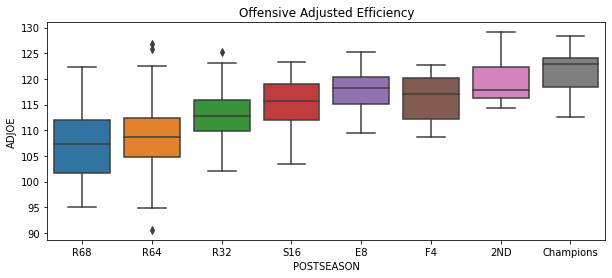

In [83]:
fig = plt.figure(figsize = (10,4))
sns.boxplot(data=Qaulified_For_MM, x='POSTSEASON', y='ADJOE', order=Postseason_labels)
plt.title('Offensive Adjusted Efficiency')

**Championship ADJDE**

The ADJDE of championship teams while superior to teams in other rounds, was less significant than ADJOE. Because ADJDE is a defensive stat, the lower the better. The median ADJDE of championship teams is 94. Championship teams have a statistically significant better ADJDE than R68 and R64 teams, but no statistical advantage over R32+ teams. However, the interquartile range is tightly grouped between 90 and 95 which may signify that championship-caliber teams have high ADJDE consistency. 

Text(0.5, 1.0, 'Defensive Adjusted Efficiency')

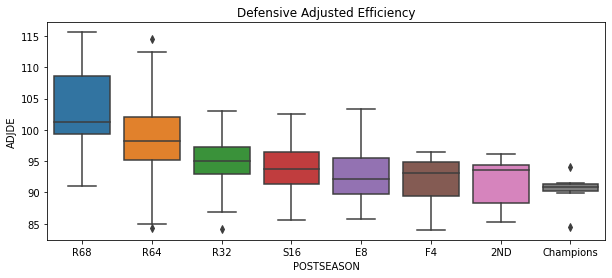

In [84]:
fig = plt.figure(figsize = (10,4))
sns.boxplot(data=Qaulified_For_MM, x='POSTSEASON', y='ADJDE', order=Postseason_labels)
plt.title('Defensive Adjusted Efficiency')

**Championship 2 and 3 point percentage**

Other stats were explored but were not found to have a high correlation with championship teams. 2P_O and 2P_D didn't show a lot of distinction between championship-caliber teams and teams from other rounds. In fact, the median 2P_O was in line with the R16+ teams. For 2P_D, the champion only showed a signficant difference from R68 teams. While these stats are important, they do not have a high individual correlation with winning a championship. 

Text(0.5, 1.0, 'Defensive 2 Point Shots Percentage Allowed')

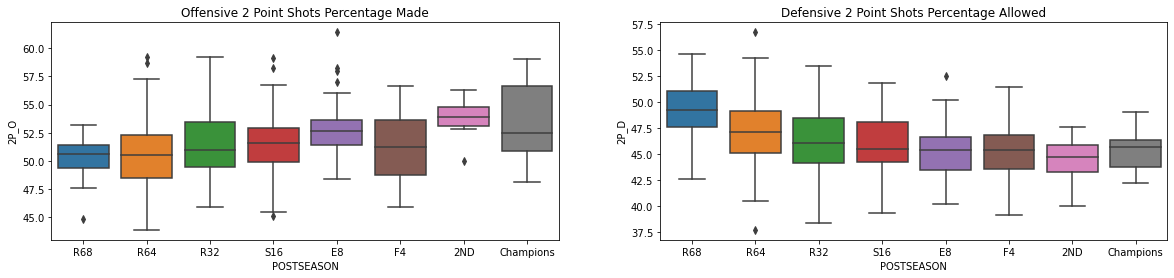

In [85]:
fig, ax = plt.subplots(1,2, figsize=(20,4))
sns.boxplot(ax= ax[0], data=Qaulified_For_MM, x='POSTSEASON', y='2P_O', order=Postseason_labels)
ax[0].set_title('Offensive 2 Point Shots Percentage Made')
sns.boxplot(ax= ax[1], data=Qaulified_For_MM, x='POSTSEASON', y='2P_D', order=Postseason_labels)
ax[1].set_title('Defensive 2 Point Shots Percentage Allowed')

Text(0.5, 1.0, 'Defensive 3 Point Shot Percentage Allowed')

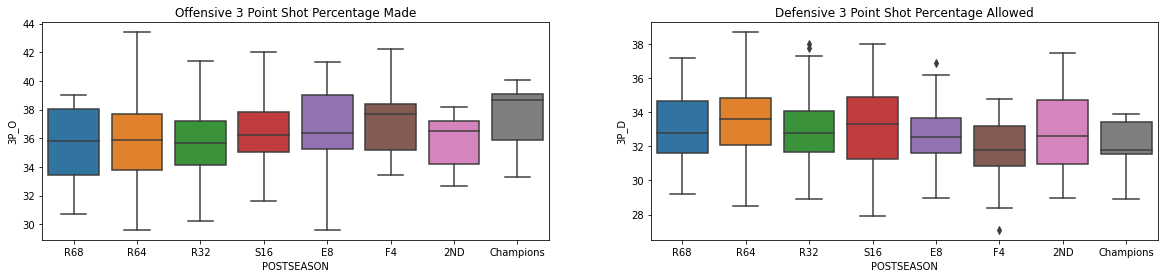

In [86]:
fig, ax = plt.subplots(1,2, figsize=(20,4))
sns.boxplot(ax= ax[0], data=Qaulified_For_MM, x='POSTSEASON', y='3P_O', order=Postseason_labels)
ax[0].set_title('Offensive 3 Point Shot Percentage Made')
sns.boxplot(ax= ax[1], data=Qaulified_For_MM, x='POSTSEASON', y='3P_D', order=Postseason_labels)
ax[1].set_title('Defensive 3 Point Shot Percentage Allowed')

### Correlation Between Stats and ADJOE/ADJDE

Because ADJOE and ADJDE both seem to be the most significant stats when determining championship teams, it can be helpful to take a closer look at the correlation between other stats and ADJOE/ADJDE. Below is a heatmap that shows the relative correlation with darker being more correlated and lighter less correlated. The stats that have a weak to strong correlation (.30 to 1) with ADJOE are EFG_O, 2P_O, 3P_O, and TOR. The stats that have a weak to strong correlation with ADJDE are EFG_D, 2P_D, and 3P_D.

Text(0.5, 1.0, 'Defensive Correlations')

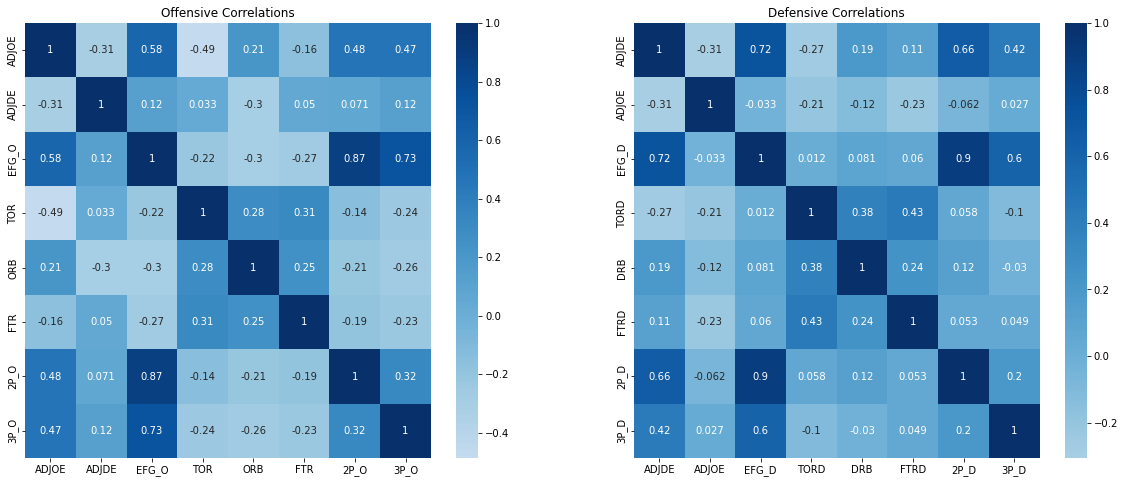

In [87]:
Offensive_Stats = Qaulified_For_MM[['ADJOE','ADJDE','EFG_O','TOR','ORB','FTR','2P_O','3P_O']]
Defensive_Stats = Qaulified_For_MM[['ADJDE','ADJOE','EFG_D','TORD','DRB', 'FTRD', '2P_D','3P_D']]
Offensive_Corr = Offensive_Stats.corr()
Defensive_Corr = Defensive_Stats.corr()
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.heatmap(ax=ax[0], data=Offensive_Corr, cmap='Blues', annot=True, center=0)
sns.heatmap(ax=ax[1], data=Defensive_Corr, cmap='Blues', annot=True, center=0)
ax[0].set_title('Offensive Correlations')
ax[1].set_title('Defensive Correlations')

### Offensive Stats and ADJOE

**EFG_O**

EFG_O had a moderate correlation with ADJOE at a value of .58. While this isn't considered strong, it is the stat with the highest correlation to ADJOE. 2P_O and 3P_O had a correlations of 0.48 and 0.47 respectivly. EFG_O is a stat that reflects that 2 point shots and 3 point shots have different point values and give weight accordingly. That is why EFG_O has a higher correlation than the indivdual stats of 3P_O and 2P_O. However, both 2P_O and 3P_O showed a very strong correlation with EFG_O with respective values of 0.87 and 0.73. This might mean that 2 point shots are easier to be consistent with and in turn have a bigger impact on EFG_O.

Text(0.5, 1.0, 'Adjusted Offensive Efficiency and Effective Field Goal% Made')

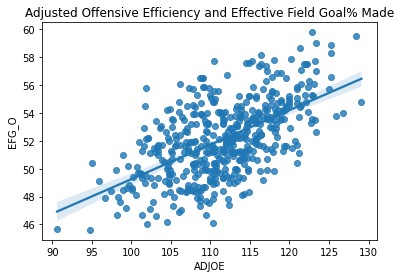

In [88]:
fig = plt.figure()
sns.regplot(data=Qaulified_For_MM, x='ADJOE', y='EFG_O')
plt.title('Adjusted Offensive Efficiency and Effective Field Goal% Made')

**TOR**

An interesting finding is that TOR has a moderate negative correlation with ADJOE at -0.50. The median TOR of 2nd and championship teams is between 16 and 17 percent, while the 25th percentile TOR of teams in other rounds is at 16%, meaning that only 25% of teams not in 2nd  or championship round have equal or better TOR. It makes sense that TOR has a negative correlation with ADJOE because a turnover is mutually exclusive with scoring. If you turn the ball over, you can't score in that same posession. 

Text(0.5, 1.0, 'Championship TOR')

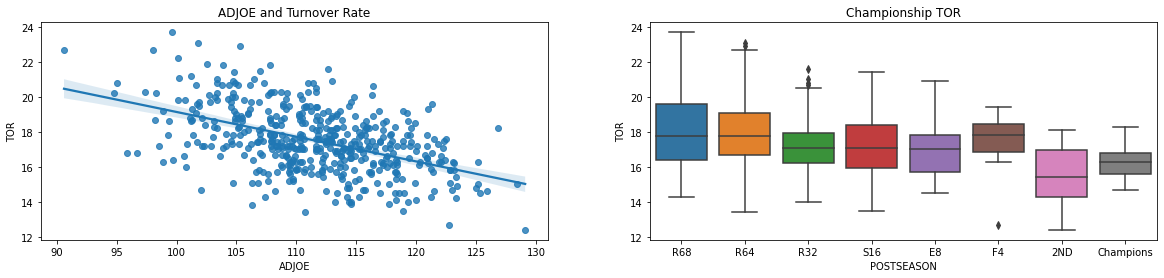

In [89]:
fig, ax = plt.subplots(1,2, figsize=(20,4))
sns.regplot(ax= ax[0], data=Qaulified_For_MM, x='ADJOE', y='TOR')
ax[0].set_title('ADJOE and Turnover Rate')
sns.boxplot(ax= ax[1], data=Qaulified_For_MM, x='POSTSEASON', y='TOR', order=Postseason_labels)
ax[1].set_title('Championship TOR')

### Defensive Stats and ADJDE
A common theme that is seen with defensive stats are that they had a higher correlation with each other than offenseive stats. For example, EFG_D has a 0.72 correlation with ADJDE vs the 0.58 correlation EFG_O has with ADJOE. This could mean that defense is less variable and easier to be consistent with or that there is less strategic nuance with defence that would translate to more consistency. 

One pattern is that correlation for 2 point shots was consistently higher than correlation with 3 point shots with respect to ADJDE and EFG_D. Meaning that a team's ability to shoot and make 3 point shots doesn't impact your ADJDE or EFG_D. Of course, it could just be that among the games played to this point 3 point shots haven't had a major impact. 

# Apendix

### Offensive and Defensive EFG 

This figure shows the box plots of EFG_O and EFG_D for teams in different rounds. While there is not a statisitical significance among the numbers, there does seem to be a general uptrend in the data.

Text(0.5, 1.0, 'Effective Field Goals Percentage Allowed')

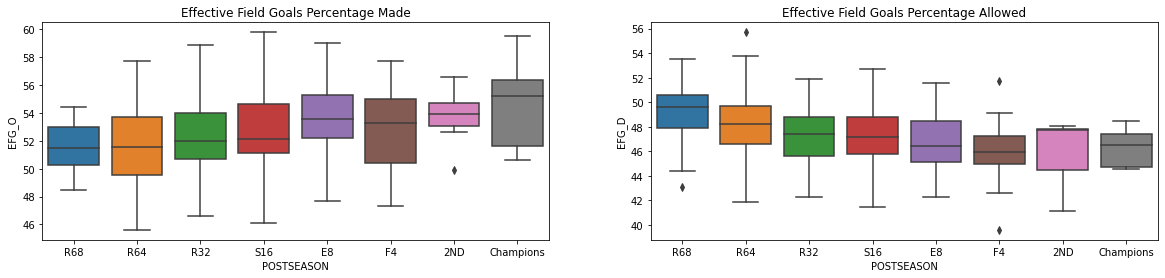

In [90]:
fig, ax = plt.subplots(1,2, figsize=(20,4))
sns.boxplot(ax= ax[0], data=Qaulified_For_MM, x='POSTSEASON', y='EFG_O', order=Postseason_labels)
ax[0].set_title('Effective Field Goals Percentage Made')
sns.boxplot(ax= ax[1], data=Qaulified_For_MM, x='POSTSEASON', y='EFG_D', order=Postseason_labels)
ax[1].set_title('Effective Field Goals Percentage Allowed')